 Association Analysis - Apriori/FP Growth


VARAHA KRISHNA ARANGI


## Tasks

1.    Load the dataset (from the csv file)

In [1]:
# Import your Libraries
import pandas as pd
from pandas import DataFrame
import csv
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder



In [2]:
# Write your code here
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv("dataset1.csv")
df = df.drop('Tid',axis = 1)
df.head()

,items
0,"Bread, Corn, Dill, Ice cream, Sugar, Yogurt, c..."
1,"Milk,"
2,"Apple, Butter, Dill, Ice cream, Milk, Yogurt, ..."
3,"Butter, Cheese, Dill, Milk, Nutmeg, Onion,"
4,"Apple, Bread,"


In [3]:
df['items'] = df['items'].str.strip(', ').str.replace(',+', ',', regex=True)

In [4]:
df.head()

,items
0,"Bread, Corn, Dill, Ice cream, Sugar, Yogurt, c..."
1,Milk
2,"Apple, Butter, Dill, Ice cream, Milk, Yogurt, ..."
3,"Butter, Cheese, Dill, Milk, Nutmeg, Onion"
4,"Apple, Bread"


2.    Pre-process the dataset and provide a detailed explanation (such as Handling of null values, empty strings, unncessary trailing characters such as commas and white spaces)

3.    Encode the dataset

In [5]:
# Write your code here

# Convert the 'items' column into a list of lists
transactions = df['items'].str.split(',').tolist()

# Encode the transaction data
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

df_encoded.head()

,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,...,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt
0,False,False,False,True,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,True,False,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


For each of the combinations in tasks 4 & 5, print the output in the following Sample format: 

- Support = 0.02
- Confidence = 0.1
- Total Number of Association Rules: 10
- Top 5 rules ordered by Confidence descending:
- Number of Maximal Sets: 5
- Number of Closed Sets: 5

4.	Execute Apriori algorithm and generate rules for 3 different combinations of support and confidence

In [6]:
# Write your code here
# Write your code here
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules

support_thresholds = [0.1, 0.2, 0.1]
confidence_thresholds = [0.1, 0.01, 0.2]

# Define support and confidence thresholds

# Execute Apriori algorithm and generate rules
for supp,conf in zip(support_thresholds, confidence_thresholds):
        frequent_itemsets = apriori(df_encoded, min_support=supp, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
        print(f"Support = {supp}")
        print(f"Confidence = {conf}")
        print(f"Total Number of Association Rules: {len(rules)}")
        print("Top 5 rules ordered by Confidence descending:")
        print(rules.sort_values(by='confidence', ascending=False).head(5))
        print(f"Number of Maximal Sets: {len(frequent_itemsets)}")
        print(f"Number of Closed Sets: {len(rules)}")
        print()

Support = 0.1
Confidence = 0.1
Total Number of Association Rules: 262
Top 5 rules ordered by Confidence descending:
             antecedents   consequents  antecedent support  \
1               ( Bread)       (Apple)            0.154154   
227    ( Sugar,  Butter)       (Apple)            0.145145   
29             ( Butter)       (Apple)            0.288288   
240       ( Dill,  Milk)  ( chocolate)            0.184184   
238  ( Dill,  chocolate)       ( Milk)            0.192192   

     consequent support   support  confidence      lift  leverage  conviction  \
1              0.383383  0.154154    1.000000  2.608355  0.095054         inf   
227            0.383383  0.100100    0.689655  1.798866  0.044454    1.986876   
29             0.383383  0.188188    0.652778  1.702676  0.077663    1.775856   
240            0.421421  0.111111    0.603261  1.431491  0.033492    1.458335   
238            0.396396  0.111111    0.578125  1.458452  0.034927    1.430764   

     zhangs_metric  
1  

5.    Execute FP Growth algorithm and generate rules for 3 different combinations of support and confidence

In [7]:
for supp,conf in zip(support_thresholds, confidence_thresholds):
        frequent_itemsets = fpgrowth(df_encoded, min_support=supp, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
        print(f"Support = {supp}")
        
        
        print(f"Confidence = {conf}")
        print(f"Total Number of Association Rules: {len(rules)}")
        print("Top 5 rules ordered by Confidence descending:")
        print(rules.sort_values(by='confidence', ascending=False).head(5))
        print(f"Number of Maximal Sets: {len(frequent_itemsets)}")
        print(f"Number of Closed Sets: {len(rules)}")
        print()

Support = 0.1
Confidence = 0.1
Total Number of Association Rules: 262
Top 5 rules ordered by Confidence descending:
             antecedents   consequents  antecedent support  \
201             ( Bread)       (Apple)            0.154154   
151    ( Sugar,  Butter)       (Apple)            0.145145   
123            ( Butter)       (Apple)            0.288288   
52        ( Dill,  Milk)  ( chocolate)            0.184184   
50   ( Dill,  chocolate)       ( Milk)            0.192192   

     consequent support   support  confidence      lift  leverage  conviction  \
201            0.383383  0.154154    1.000000  2.608355  0.095054         inf   
151            0.383383  0.100100    0.689655  1.798866  0.044454    1.986876   
123            0.383383  0.188188    0.652778  1.702676  0.077663    1.775856   
52             0.421421  0.111111    0.603261  1.431491  0.033492    1.458335   
50             0.396396  0.111111    0.578125  1.458452  0.034927    1.430764   

     zhangs_metric  
201

6.	Plot the following graphs comparing both the algorithms:
    - time vs minimum support
    - time vs number of itemsets

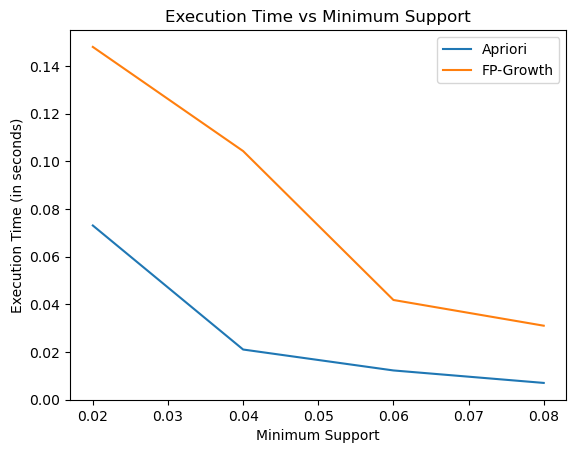

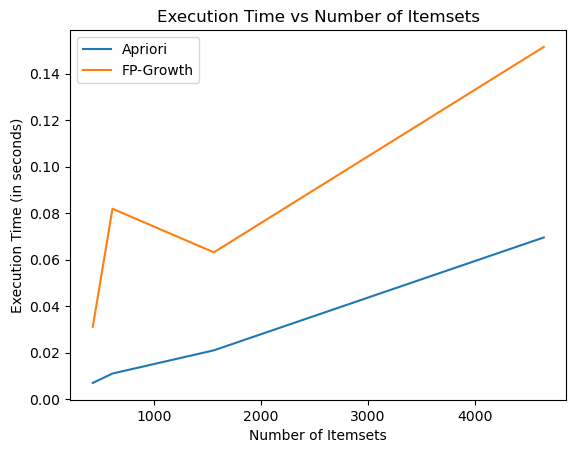

In [8]:
# Write your code here
# Write your code here
import time
import matplotlib.pyplot as plt

# Execution time vs minimum support
min_support_values = [0.02, 0.04, 0.06, 0.08]
execution_time_apriori = []
execution_time_fp = []

for s in min_support_values:
    start_time = time.time()
    frequent_itemsets_ap = apriori(df_encoded, min_support=s, use_colnames=True)
    end_time = time.time()
    execution_time_apriori.append(end_time - start_time)
    
    start_time = time.time()
    frequent_itemsets_fp = fpgrowth(df_encoded, min_support=s, use_colnames=True)
    end_time = time.time()
    execution_time_fp.append(end_time - start_time)

plt.plot(min_support_values, execution_time_apriori, label="Apriori")
plt.plot(min_support_values, execution_time_fp, label="FP-Growth")
plt.xlabel("Minimum Support")
plt.ylabel("Execution Time (in seconds)")
plt.title("Execution Time vs Minimum Support")
plt.legend()
plt.show()

# Execution time vs number of itemsets
num_itemsets_values = [len(apriori(df_encoded, min_support=s, use_colnames=True)) for s in min_support_values]
execution_time_apriori = []
execution_time_fp = []

for i in range(len(min_support_values)):
    start_time = time.time()
    frequent_itemsets_ap = apriori(df_encoded, min_support=min_support_values[i], use_colnames=True)
    end_time = time.time()
    execution_time_apriori.append(end_time - start_time)
    
    start_time = time.time()
    frequent_itemsets_fp = fpgrowth(df_encoded, min_support=min_support_values[i], use_colnames=True)
    end_time = time.time()
    execution_time_fp.append(end_time - start_time)

plt.plot(num_itemsets_values, execution_time_apriori, label="Apriori")
plt.plot(num_itemsets_values, execution_time_fp, label="FP-Growth")
plt.xlabel("Number of Itemsets")
plt.ylabel("Execution Time (in seconds)")
plt.title("Execution Time vs Number of Itemsets")
plt.legend()
plt.show()


7.    Explain the insights that you got from the graphs. Which algorithm worked better and what do you believe is the reason?


'''From the first graph, we can see that the  FP-Growth takes longer to execute than Apriori algorithm for all the minimum support values. This is because FP-Growth is typically seen as being faster than Apriori in terms of execution time, there may be some situations in which Apriori outperforms FP-Growth.

For instance, if the minimum support level is high and the dataset is small, Apriori might be quicker because it produces fewer candidate itemsets. Apriori may also perform better if the dataset has a high level of sparsity because it can effectively handle sparse datasets.
In addition, longer execution delays brought on by frequent disk I/O operations may result if the FP tree created by FP-Growth is too huge and cannot fit into the RAM. Apriori might perform better in these circumstances because of its decreased memory need.

From the second graph, we can see that Apriori generates more itemsets than FP-Growth for the same minimum support value. This is because Apriori generates candidate itemsets using the frequent itemsets of size k-1, whereas FP-Growth generates conditional pattern bases for each frequent item and constructs the FP-Tree. This makes FP-Growth more efficient in terms of generating itemsets.

Overall, FP-Growth is a more efficient algorithm for frequent itemset mining than Apriori, especially for larger datasets with high dimensionality.'''

References:
https://www.educative.io/answers/what-is-fp-growt
https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
https://www.geeksforgeeks.org/what-is-support-and-confidence-in-data-mi
https://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/
https://github.com/matplotlib/matplotlib/issues/12692/
